# Homework 3

In [130]:
# Import Packages
from pyspark import SparkConf, SparkContext
from pyspark.ml.linalg import Vectors
import random
import time

### Load the Datasets

In [131]:
def readVectorsSeq(filename):
    file = open(filename, 'r')
    vector_list = []
    for row in file.readlines():
        vector_list.append(Vectors.dense([float(num_str) for num_str in row.split()]))
    return vector_list

In [132]:
vector_list = readVectorsSeq('test-datasets/prova.txt')

# Print Info of the Dataset
print 'INFO OF THE DATASET:'
print '- Number of points:', len(vector_list)
print '- Dimensionality of a Point:', len(vector_list[0])

INFO OF THE DATASET:
- Number of points: 11
- Dimensionality of a Point: 50


## Fake 2-D Dataset for Testing

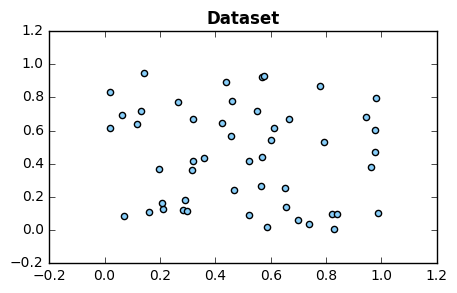

In [133]:
import numpy as np
import matplotlib.pyplot as plt

vector_list = []
np.random.seed(seed=0)
n_points = 50
for i in range(n_points):
    vector_list.append(Vectors.dense(np.random.rand(2)))

# Plot
plt.figure(figsize=(5, 3))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue')
plt.show()

### K-Centers

In [134]:
def kcenter(P, k):
    
    # Initialization
    random.shuffle(P)
    S = [P[0]]
    P.pop(0)
    
    for iteration in range(k-1):
        dist_max = 0
        idx_max = 0
        for i in range(len(P)):
            c_i = P[i]
            dist_min = Vectors.squared_distance(c_i, S[0])
            idx_min = 0
            for j in range(len(S)):
                c_j = S[j]
                dist = Vectors.squared_distance(c_i, c_j)
                if dist < dist_min:
                    dist_min = dist
                    idx_min = j
            if dist_min > dist_max:
                dist_max = dist_min
                idx_max = i
        S.append(P[idx_max])
        P.pop(idx_max)
    return S

In [135]:
P = [p for p in vector_list]
centers = kcenter(P, 5)

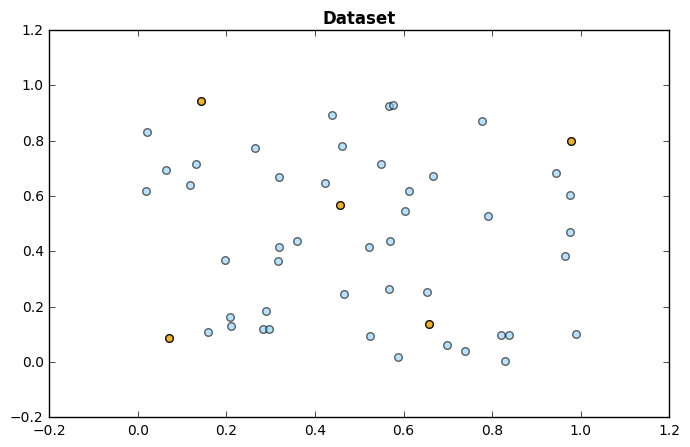

In [136]:
# Plot
plt.figure(figsize=(8, 5))
plt.title('Dataset', fontweight='bold')
for i in range(n_points):
    plt.scatter(vector_list[i][0], vector_list[i][1], c='lightskyblue', s=30, alpha=0.6)

for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], c='orange', s=30, alpha=0.8)
plt.show()

<hr>
### Time Complexity of the K-Center Algorithm

In [150]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 50*(n+1)
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kcenter(P, 5)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [151]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)*n_datasets
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([(i+1)*50 for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.000224337043167 * |P| + 0.00367602328865 [s]


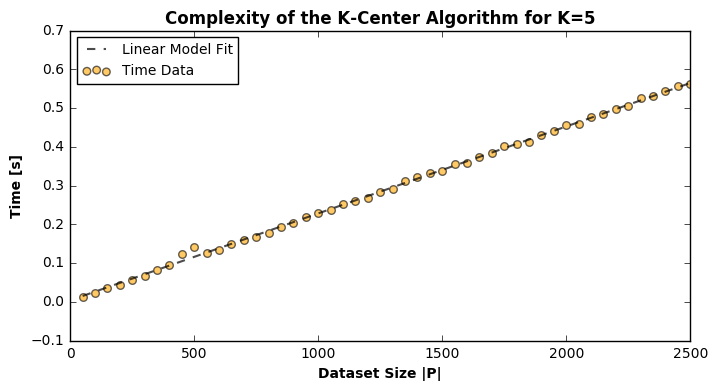

In [162]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* |P| +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Center Algorithm for K=5', fontweight='bold')
plt.scatter([(i+1)*50 for i in range(n_datasets)], times, alpha=0.6, c='orange', label='Time Data', s=30)
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Dataset Size |P|', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets*n_datasets)
plt.legend(loc=2, prop={'size':10})
plt.show()

#### Comments of the Plot Above
We see that we have a linear trend on time complexity varing the dataset size $|P|$, so we can say that with fixed number of centers ($K=5$ in this case) we have: 

$$\text{Time Complexity} \in O(|P|)$$

In [163]:
# Create the Datasets
n_datasets = 50
datasets = []
for n in range(n_datasets):
    vector_list = []
    np.random.seed(seed=n)
    n_points = 100
    for i in range(n_points):
        vector_list.append(Vectors.dense(np.random.rand(2)))
    datasets.append(vector_list)

times = []
datasets_centers = []
for n in range(n_datasets):
    P = [p for p in datasets[n]]
    t1 = time.time()
    centers = kcenter(P, 2+n)
    t2 = time.time()
    datasets_centers.append(centers)
    times.append(t2-t1)

In [166]:
# Get the Linear Regression Model for the Time
y = np.array(times).reshape(n_datasets, 1)
X = np.zeros((n_datasets, 2))
X[:, 0] = np.ones((n_datasets,))
X[:, 1] = np.arange(1, n_datasets+1)
beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
x = np.array([2+i for i in range(n_datasets)])
linear_model = x*beta[1] + beta[0]

Fit of the Time Complexity:
Time = 0.032092421155 * K + -0.208937016896 [s]


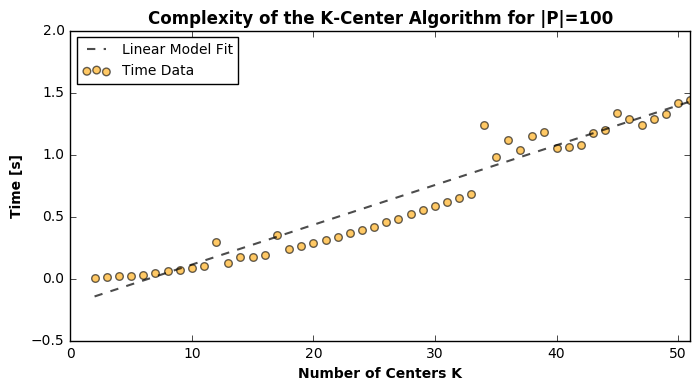

In [175]:
print 'Fit of the Time Complexity:'
print 'Time =', beta[1,0],'* K +', beta[0,0], '[s]'

# Plot
plt.figure(figsize=(8, 4))
plt.title('Complexity of the K-Center Algorithm for |P|=100', fontweight='bold')
plt.scatter([2+i for i in range(n_datasets)], times, s=30, c='orange', alpha=0.6, label='Time Data')
plt.plot(x, linear_model, c='k', lw=1.5, alpha=0.7, ls='--', label='Linear Model Fit')
plt.xlabel('Number of Centers K', fontweight='bold')
plt.ylabel('Time [s]', fontweight='bold')
plt.xlim(0, n_datasets+1)
plt.legend(loc=2, prop={'size':10})
plt.show()

#### Comments of the Plot Above
I have to fix the algorithm because I see that the complexity varing $K$ and keeping fixed $|P|$ the trend is not perfectly linear.